## Exploratory Data Analysis on Titanic Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
train=pd.read_csv("titanic/train.csv")

In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Data 
### using seaborn heatmap to find the null values.

In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

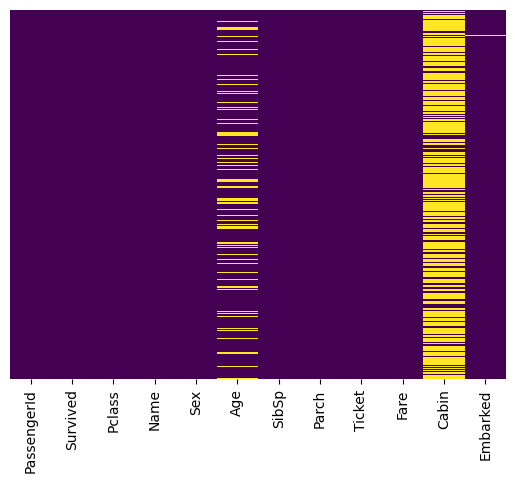

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#yticklabes,cbar,cmap are extra attributes for making it visually understandable

### As we can see, about 20% of the age is null, and almost 90% of cabin is null values. Missing age can be filled by some form of imputation but for cabin we are going to drop the column as that column doesnt contribute much for our analysis.

<Axes: xlabel='Survived', ylabel='count'>

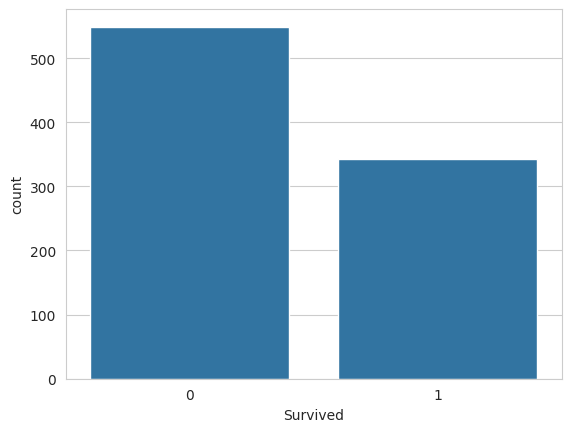

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

### now we visualize the survival of male and female as well using seaborn countplot

<Axes: xlabel='Survived', ylabel='count'>

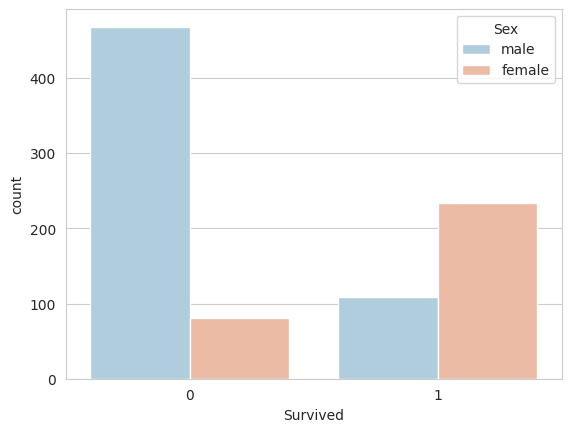

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

### We see that mostly female survived and mostly male didnot survive

<Axes: xlabel='Survived', ylabel='count'>

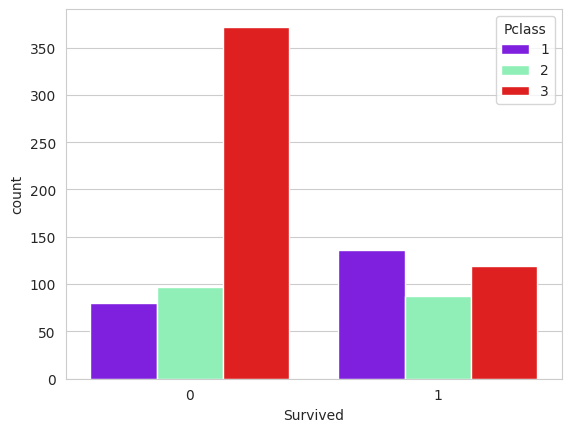

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
#here in Pclass, 1 means 1st class, 2 means 2nd class, 3 means 3rd class

### we see that more than 350 people from 3rd class and less than 100 people from 1st and 2nd class couldn't survive. Similarly, most of the 1st class people survived.

/tmp/ipykernel_5879/2002818437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)


<Axes: xlabel='Age'>

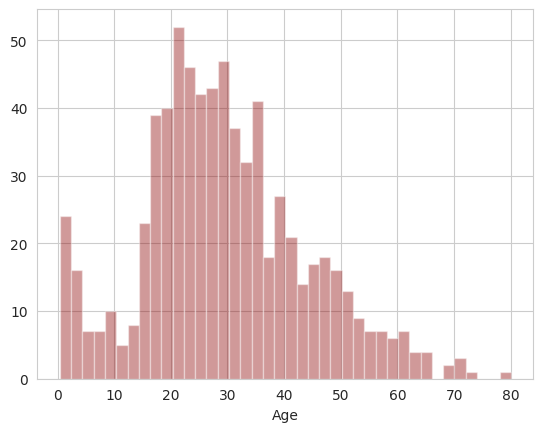

In [12]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

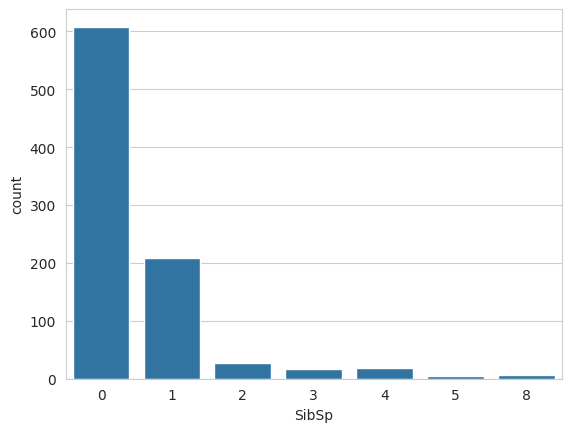

In [14]:
sns.countplot(x='SibSp', data=train)

### from the above countplot, we see that around 600 people on board didnot have any siblings or spouse and rest of the data can be seen.

<Axes: >

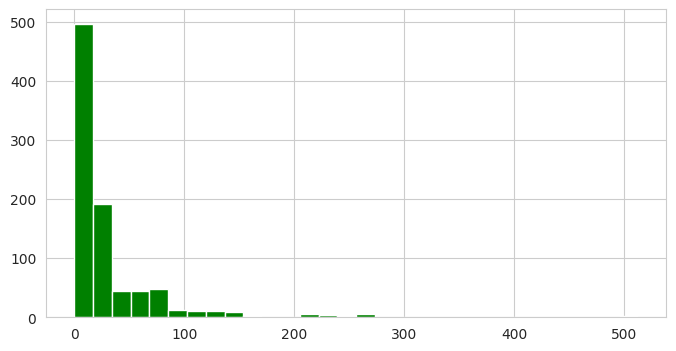

In [16]:
train['Fare'].hist(bins=30, color='green', figsize=(8,4))

## Data Cleaning

### Now its time to clean our data by either removing the null values or we apply some form of imputation to it.

/tmp/ipykernel_5879/3505176627.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',palette='winter',data=train)


<Axes: xlabel='Pclass', ylabel='Age'>

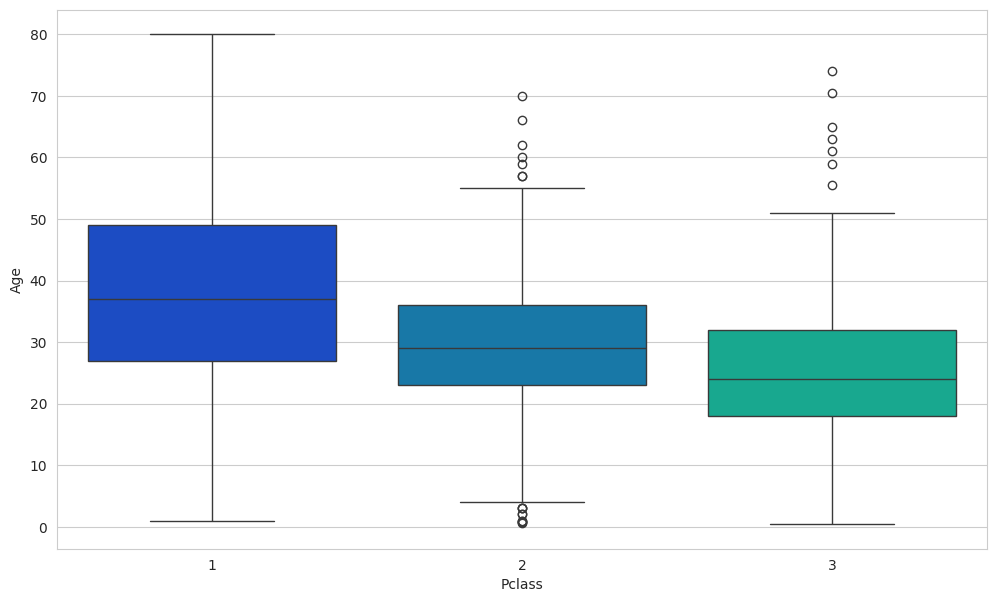

In [20]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',palette='winter',data=train)

In [21]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass== 1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [23]:
#now applying this function

In [24]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

/tmp/ipykernel_5879/619711104.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
/tmp/ipykernel_5879/619711104.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


### Let's check the heatmap again to make sure the null values in age is imputed properly

<Axes: >

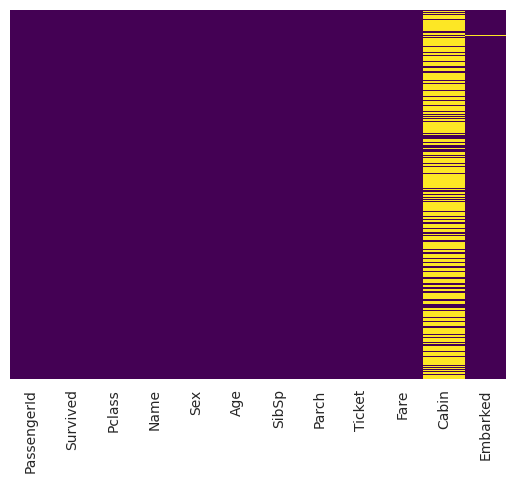

In [26]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')